In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# Depends on where you stored the file, in my case it was
# stored in my google drive.
data = pd.read_csv('/content/drive/MyDrive/ECE_449/wdbc.data')
# data = pd.read_csv('/wdbc.data')

dropped_first_column = False

In [ ]:
# Mean Imputation for missing data if exists.
# From stackoverflow https://stackoverflow.com/a/63158885
for value in data.columns[data.isnull().any(axis=0)]:
  data[value].fillna(data[value].mean(), inplace = True)
  print(data[value])

,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<ipython-input-7-b80c0e03f8a5>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(columns, str(count))
<ipython-input-7-b80c0e03f8a5>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(columns, str(count))
<ipython-input-7-b80c0e03f8a5>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(columns, str(count))
<ipython-input-7-b80c0e03f8a5>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(columns, str(count))
<ipython-input-7-b80c0e03f8a5>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(columns, str(count))
<ipython-input-7-b80c0e03f8a5>:16: Futur

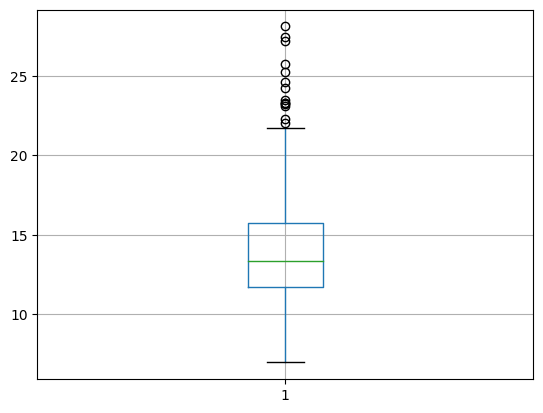

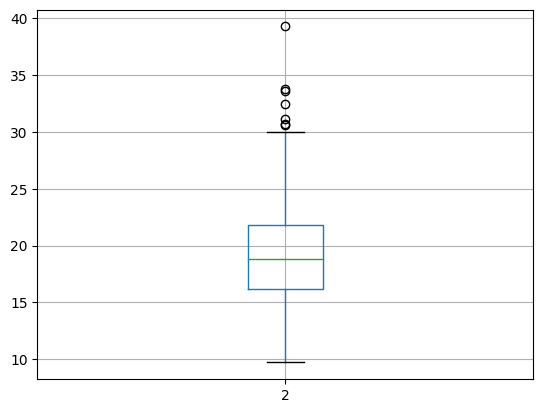

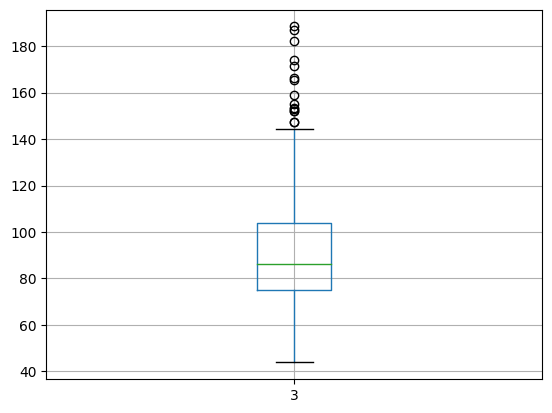

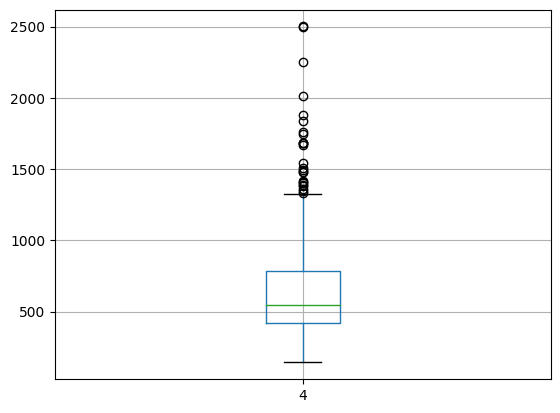

In [ ]:
# Side-by-side box and whisker plots
# Drop the ID attribute, since it has no consistent name, we are just going to
# drop the first column
if dropped_first_column is False:
  data.drop(columns=data.columns[0], inplace=True)
  dropped_first_column = True

display(data);

# Drop the irrelevant attributes
count = 1
for columns in data.drop(columns = 'M').columns:
  if count > 10:
    data.drop(columns = columns, inplace = True)
  else:
    data.columns = data.columns.str.replace(columns, str(count))
  count += 1

# Plot into a side-by-side box and whiskers plot.
# data.drop(columns = "M").boxplot();
for column in data.drop(columns = "M"):
  plt.figure()
  data.boxplot([column])

In [ ]:
# Label Encoder to transform class labels to 0 and 1 for benign and malignant
encoder = LabelEncoder()
data['M'] = pd.factorize(data['M'])[0]

In [ ]:
# Split data to train and test
# Target variable (y) - is the variable whose values are modeled and predicted by other values
# Predictor variables (x) - is a variable whose values will be used to predict the value of the target variable
# We are trying to find out the "diagnosis" by using the attributes given.
y = data['M']
x = data.drop(columns = 'M')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, train_size = 0.8, stratify = y)

In [ ]:
# Resource: https://medium.com/analytics-vidhya/beginners-guide-to-k-nearest-neighbors-pipelines-in-classification-704b87f534e2
# Build an AI Pipeline
# do we have to add our data in the pipeline?
pipe = make_pipeline(
      MinMaxScaler(),
      KNeighborsClassifier()
)

# fitting the pipeline to the training data.
# pipe.fit(x_train, y_train)

# Score the KNN model on the testing data
# pipe.score(x_test, y_test)

In [ ]:
# Automatic exploration using GridSearchCV from Kaggle
# link: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv?cellId=15&cellIds=15&kernelSessionId=28312802

# 2 Different Ways
# Without GridSearchCV
# scores = []
# f1_scores = []

# for i in range (1, 11):
#   pipe = make_pipeline(
#         MinMaxScaler(),
#         KNeighborsClassifier(n_neighbors = i)
#   )

#   pipe.fit(x_train, y_train)
#   y_pred = pipe.predict(x_test)
#   scores.append(pipe.score(x_test, y_test))
#   f1_scores.append(f1_score(y_test, y_pred))

# plt.plot(range(1,11), f1_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('F1 Scores')
# plt.title("F1 scores vs. values of K for Knn")
# plt.show()

# print("F1 Scores\n", f1_scores)

# With GridSearchCV
pipe = Pipeline(steps = [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
k_range = list(range(1,11))

# Parameters of pipelines need to be set using '__' separater param names.
param_grid = dict(knn__n_neighbors = k_range)

# Using F1 scoring for performance evaluation
# Not Sure if "f1" does anything, because I think it can be changed for anything
f1_scorer = make_scorer('f1') # Figure this out and use it on GridSearchCV
grid = GridSearchCV(pipe, param_grid, scoring='f1', return_train_score=False)
grid.fit(x,y)

# Maybe the values of the graph are different because this is the mean_test_score
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean F1 Scores')
plt.title("F1 scores vs. values of K for Knn")
plt.show()
print(grid.best_score_)
print("Best Choice for Parameter 'K': \n", grid.best_params_)

# Conclusion

The mean F1 Scores of my AI

I am not very impressed with the mean F1 Scores that I have generated. I was expecting high 90s or 99% but that is most likely because of the choice of classifier. K-Nearest Neighbours is a simple classifier, it is easy to implement, adapts easily and has very few parameters, but the classifer does not scale well since it takes more memory and data storage compared to other classifiers. The classifier doesn't perform well with high-dimensinoal data, and it is also prone to overfitting.
But if you are still interested in my conclusion, I have found that the best choice of parameter 'k' from my AI pipeline is k = 9, with the F1 Mean score of 95.08%.

From the given dataset from Wisconsin Breast Cancer Diagnostic dataset, there were no need for data imputation because there were no empty data in any field.
From the dataset given there were 33 column in total, all but the diagnosis and the 10 important attributes were dropped. I couldn't specify which column I wanted dropped becauser there were no consistent column names, so I just had it drop the first column of the raw dataset to eliminate ID Number column. The box and whiskers plot could have been shown in 1 figure, but I thought that it would be better to graph them individually because they have varying dimension values.

When loading a new dataset, I would have to change the name and address of pd.read_csv(''), because it depends on the location and name of the file.